In [102]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import copy
import pandas as pd

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
from EEGNet import *
from sklearn import metrics

In [103]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [104]:
class EarthquakeData(Dataset):
    def __init__(self, h_path, d_path):
        self.c_path = h_path + d_path
        self.h_len = len(h_path)
    
    def __len__(self):
        return len(self.c_path)
    
    def __getitem__(self, idx):
        path = self.c_path[idx]
        start_date = path.split("/")[len(path.split("/"))-1].split(":")[0]

        if idx > self.h_len:
            y = 1
        else:
            y = 0
            
        X = np.loadtxt(path, delimiter=',', dtype=str).astype(np.float32)

        return X, y, start_date

In [105]:
class1_paths = glob.glob("/Users/haxby/Desktop/Earthquakes/gnss-sse-detection-main/58daysdata/area1-all/nonSSE/*.csv")
class2_paths = glob.glob("/Users/haxby/Desktop/Earthquakes/gnss-sse-detection-main/58daysdata/area1-all/SSE/*.csv")
# class2_paths = glob.glob("")

# "/Users/haxby/Desktop/Earthquakes/gnss-sse-detection-main/58daysdata/area2-all/SSE/*.csv"


# class1_paths = glob.glob("/Users/haxby/Desktop/Earthquakes/gnss-sse-detection-main/58daysdata/area1-all/after/*.csv")
# class2_paths = glob.glob("")

# class1_paths_second = glob.glob("./58daysdata/area1-rad=0.5/nonSSE/*.csv")
# class2_paths_second = glob.glob("./58daysdata/area1-rad=0.5/SSE/*.csv")

# class1_paths = class1_paths + class1_paths_second
# class2_paths = class2_paths + class2_paths_second
print(len(class1_paths))
print(len(class2_paths))

2922
2578


In [106]:
dataset = EarthquakeData(class1_paths, class2_paths)

In [107]:
num_chans = 30
model = EEGNet(Chans = num_chans, Samples = 128, nb_classes=1, kernLength=5).to(device)
model.load_state_dict(torch.load("/Users/haxby/Desktop/Earthquakes/gnss-sse-detection-main/models/area2&3/area1_full_data.pth"))
model.eval()
# for x in model.parameters():
#     print(x)

EEGNet(
  (conv1): Conv1d(30, 8, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(8, 16, kernel_size=(30,), stride=(1,), groups=8)
  (bn2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (avg_pool): AvgPool1d(kernel_size=(1,), stride=(1,), padding=(0,))
  (dropout): Dropout(p=0.5, inplace=False)
  (depthwise_conv): Conv1d(16, 16, kernel_size=(3,), stride=(1,), padding=(2,), groups=16)
  (conv1d_1x1): Conv1d(16, 16, kernel_size=(1,), stride=(1,))
  (bn3): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (avg_pool2): AvgPool1d(kernel_size=(1,), stride=(1,), padding=(0,))
  (fc): Linear(in_features=496, out_features=1, bias=True)
)

In [108]:
def binary_acc(y_pred, y_test):
    # print(f"Y pred: {y_pred}")
    # print(f"y_test: {y_test}")
    prediction = torch.round(y_pred)
    # print(f"Prediction: {prediction}")
    correct_pred = (prediction == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    acc = torch.round(acc * 100)
    return acc

In [109]:
test_acc = 0
test_dataloader = DataLoader(dataset, 1, shuffle=False)
dates = []
probabilities = []
predicted_labels = []
actual_labels = []

# print(len(test_dataloader))
for test_features, test_labels, date in test_dataloader:
    test_features, test_labels = test_features.to(device), test_labels.to(device)
    # test_features = torch.unsqueeze(test_features, 1)
    test_features = test_features.float()
    test_labels = test_labels.float()

    # print(test_labels.shape)
    test_pred = model(test_features)
    test_pred = torch.squeeze(test_pred)
    # test_loss_item = criterion(test_pred, test_labels)
    test_acc_item = binary_acc(test_pred, test_labels)

    dates.append(date[0])
    probabilities.append(test_pred.item())
    predicted_labels.append(torch.round(test_pred).item())


    actual_labels.append(test_labels.item())
    # test_loss += test_loss_item.item()
    test_acc += test_acc_item.item()

In [110]:
final_test_acc = test_acc/len(test_dataloader)
print("Testing Accuracy: ", final_test_acc)

Testing Accuracy:  53.07272727272727


In [111]:
predicted_labels

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

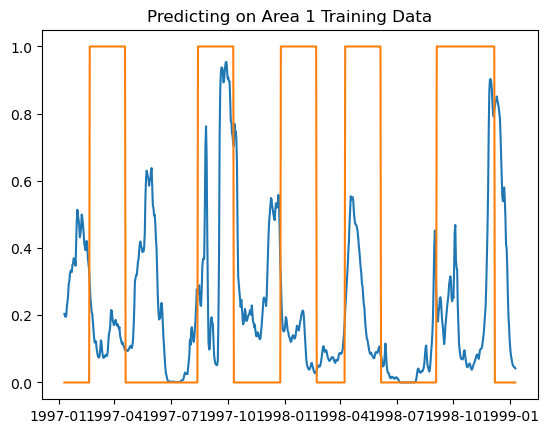

In [112]:
data_frame = pd.DataFrame({'date' : dates, 'probs' : probabilities, 'pred' : predicted_labels, 'actual' : actual_labels})
# data_frame = pd.DataFrame({'date' : dates, 'probs' : probabilities, 'pred' : predicted_labels})
data_frame['pred'] = data_frame['pred'] + 0.03
data_frame = data_frame.sort_values(by='date')
data_frame['date'] = pd.to_datetime(data_frame['date']) + pd.Timedelta(days=29)

r_n = range(0, 730)

plt.plot(data_frame['date'].iloc[r_n], data_frame['probs'].iloc[r_n])
plt.plot(data_frame['date'].iloc[r_n], data_frame['actual'].iloc[r_n])
# plt.plot(data_frame['date'].iloc[r_n], data_frame['pred'].iloc[r_n])
plt.title("Predicting on Area 1 Training Data")
# plt.legend(['Probability', 'Predicted'])
plt.savefig("2012-area-1.pdf")

# data_frame.to_csv("./confusion_matrix_data/area3/A2model_A3data.csv")


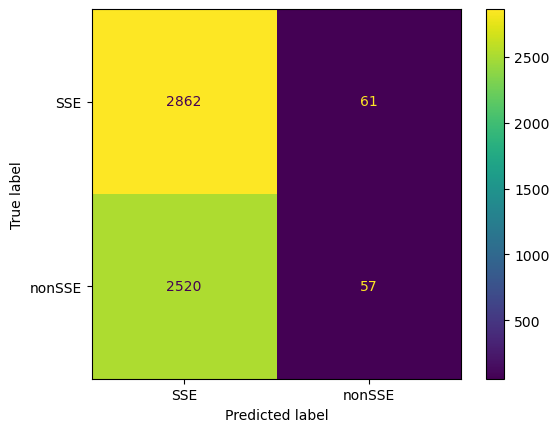

list

In [113]:
confusion_matrix =  metrics.confusion_matrix(actual_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['SSE', 'nonSSE'])
cm_display.plot()
plt.show()

type(predicted_labels)

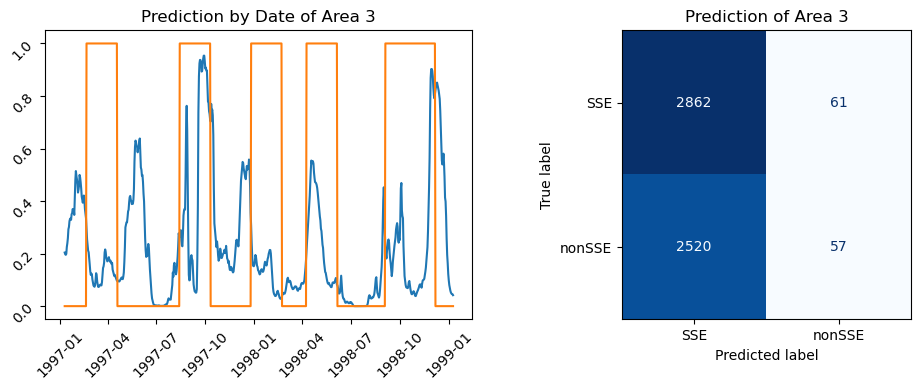

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(data_frame['date'].iloc[r_n], data_frame['probs'].iloc[r_n])
ax[0].plot(data_frame['date'].iloc[r_n], data_frame['actual'].iloc[r_n])
# ax[0].plot(data_frame['date'].iloc[r_n], data_frame['pred'].iloc[r_n])
ax[0].set_title("Prediction by Date of Area 3")
ax[0].tick_params(labelrotation=45)
# ax[0].legend(['Probability', 'Actual', 'Prediction'], bbox_to_anchor=(1, 0.5))

confusion_matrix =  metrics.confusion_matrix(actual_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['SSE', 'nonSSE'])
cm_display.plot(ax=ax[1], cmap=plt.cm.Blues, colorbar=False)
cm_display.ax_.set_title("Prediction of Area 3")
fig.tight_layout()
fig.savefig('area3predicted-by-area1model.pdf')